In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


## Data Clearning and Manipulation

In [2]:
df = pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# NAs in Company and Agent column 
# Meaning of these two columns are similar that made the booking
def booking(data):
    if data.agent is not None:
        return data.agent
    elif data.company is not None:
        return data.company
    else:
        return 0.0000

df["booking_type"] = df.apply(lambda x: booking,axis=1)

df = df.drop('company',axis =1)
df = df.drop('agent',axis =1)

In [9]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [11]:
# Since the percentage of NAs in Country and Children columns is low, I will fill the NAs with properiate value
df["country"].fillna("Not Given", inplace = True) 
df["children"].fillna(0, inplace = True) #assumption: people with no child tend to leave it blank.

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Visualization: Understand the relationship between variables

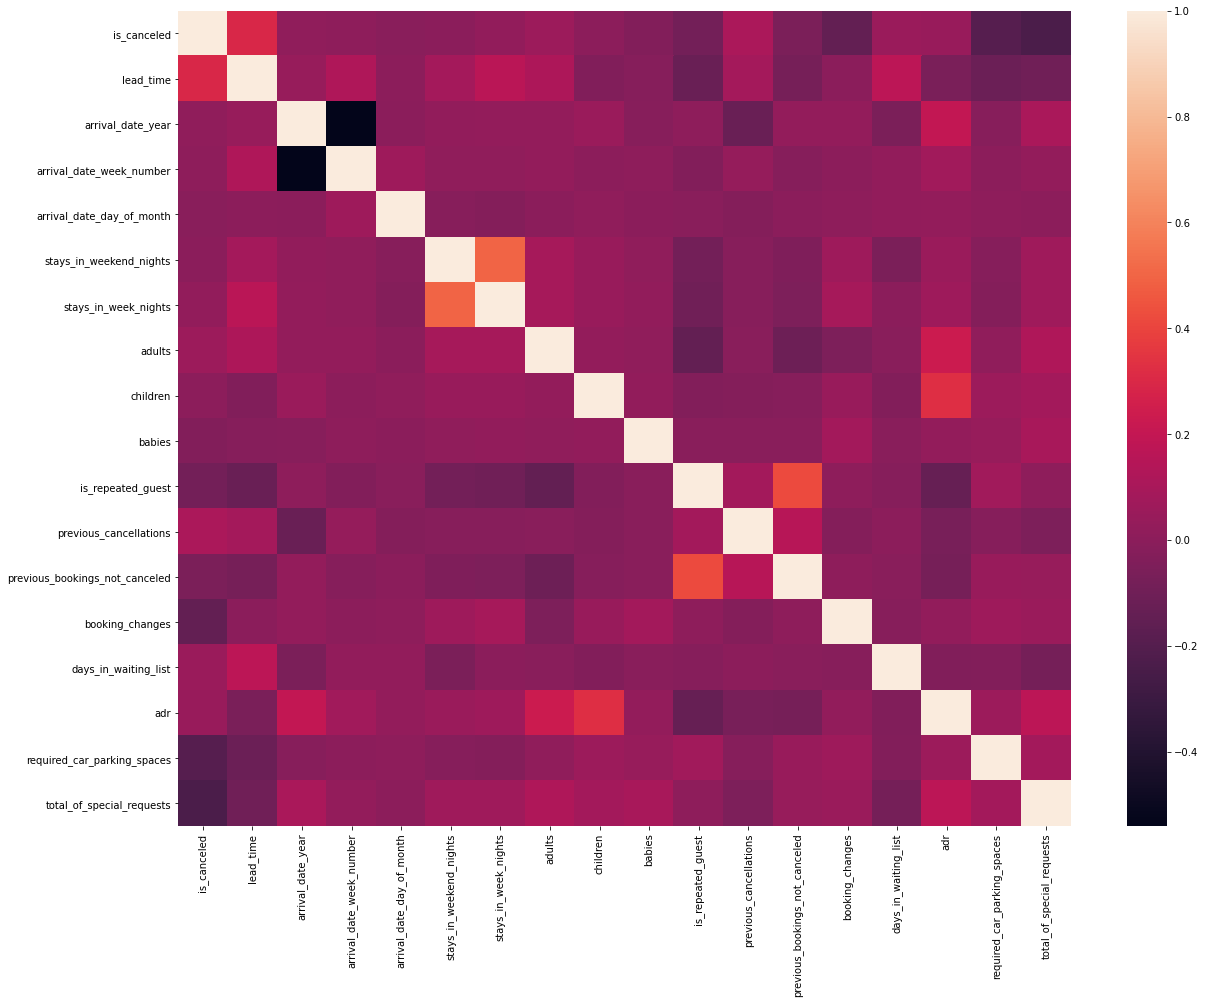

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,15))
ax = sns.heatmap(df.corr())

Based on the heatmap of correlation between dependent variable "is_canceled" and other independent variables, variable "lead-time" might be the most important variable to predict whether the booking will be canceled or not.

## Data Modeling and Prediction

In [43]:
# Packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Categorical Variable - Encoding

In [17]:
# Categorical variable - Label Code

def label_encoding(feat):
    le = LabelEncoder()
    le.fit(feat)
    return le.transform(feat)

In [20]:
df_analysis = df.copy()

for col in df_analysis.columns:
    if isinstance(df_analysis[str(col)],object):
        df_analysis[str(col)] = label_encoding(df[str(col)])


In [21]:
df_analysis.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_type
0,1,0,342,0,5,26,0,0,0,2,...,3,0,0,2,1,0,0,1,121,0
1,1,0,478,0,5,26,0,0,0,2,...,4,0,0,2,1,0,0,1,121,0
2,1,0,7,0,5,26,0,0,1,1,...,0,0,0,2,2136,0,0,1,122,0
3,1,0,13,0,5,26,0,0,1,1,...,0,0,0,2,2136,0,0,1,122,0
4,1,0,14,0,5,26,0,0,2,2,...,0,0,0,2,3535,0,1,1,123,0


In [26]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   hotel                           119390 non-null  int64
 1   is_canceled                     119390 non-null  int64
 2   lead_time                       119390 non-null  int64
 3   arrival_date_year               119390 non-null  int64
 4   arrival_date_month              119390 non-null  int64
 5   arrival_date_week_number        119390 non-null  int64
 6   arrival_date_day_of_month       119390 non-null  int64
 7   stays_in_weekend_nights         119390 non-null  int64
 8   stays_in_week_nights            119390 non-null  int64
 9   adults                          119390 non-null  int64
 10  children                        119390 non-null  int64
 11  babies                          119390 non-null  int64
 12  meal                            119390 non-n

### Train and Test Data

In [29]:
X_data = df_analysis.drop("is_canceled",axis=1)
Y_data = df_analysis["is_canceled"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.4, random_state=42)

### Model 1: Logistic Regression

In [34]:
model1_Lgr = LogisticRegression(random_state=0).fit(X_train, y_train)
model1_Lgr_pred = model1_Lgr.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
accuracy_score(y_test,model1_Lgr_pred)

0.7648253622581456

In [38]:
confusion_matrix(y_test,model1_Lgr_pred)

array([[26389,  3600],
       [ 7631, 10136]])

### Model 2: Random Forest

In [40]:
model2_Rdf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
model2_Rdf_pred = model2_Rdf.predict(X_test)

In [41]:
accuracy_score(y_test,model2_Rdf_pred)

0.9999790602227993

In [42]:
confusion_matrix(y_test,model2_Rdf_pred)

array([[29989,     0],
       [    1, 17766]])

### Model 3: XGBoosting

In [46]:
model3_Xgb = XGBClassifier(n_estimators = 100).fit(X_train, y_train)
model3_Xgb_pred = model3_Xgb.predict(X_test)

[04:43:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
accuracy_score(y_test,model3_Xgb_pred)

1.0

In [ ]:
confusion_matrix(y_test,model3_Xgb_pred)